In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import Counter
import pandas as pd
import seaborn as sns
import numpy as np

plt.style.use('seaborn-whitegrid')
Twitter_Blue = '#1DA1F2'
Reddit_RedOrange = '#FF4500'
yt_list = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
colors_gender = ['deepskyblue','hotpink']
labels_gender = ['Male', 'Female']
colors_lingo = ['gold','tomato']
labels_lingo = ['"cleaned" tweet', 'filtered portion']
gender_palette = {'MALE':'deepskyblue', 'FEMALE':'hotpink'}
default_palette = {'MALE':'#1f77b4', 'FEMALE':'#ff7f0e'}
pastel1_palette = {'MALE':'#b3cde3', 'FEMALE':'#fbb4ae'}

In [16]:
df_bitcoin_clean = pd.read_csv(r'bitcoin_clean.csv')
df_bitcoin_dropna = df_bitcoin_clean[df_bitcoin_clean !=0.].dropna(axis=0)
df_bitcoin_dropna_asc = df_bitcoin_dropna.sort_values(by=['gender'], ascending=False)

df_luna_clean = pd.read_csv(r'luna_clean.csv')
df_luna_dropna = df_luna_clean[df_luna_clean !=0.].dropna(axis=0)
df_luna_dropna_asc = df_luna_dropna.sort_values(by=['gender'], ascending=False)

df_elections_clean = pd.read_csv(r'elections_clean.csv')
df_elections_dropna = df_elections_clean[df_elections_clean !=0.].dropna(axis=0)
df_elections_dropna_asc = df_elections_dropna.sort_values(by=['gender'], ascending=False)

df_ukraineconflict_clean = pd.read_csv(r'ukraineconflict_clean.csv')
df_ukraineconflict_dropna = df_ukraineconflict_clean[df_ukraineconflict_clean !=0.].dropna(axis=0)
df_ukraineconflict_dropna_asc = df_ukraineconflict_dropna.sort_values(by=['gender'], ascending=False)

num_of_dfs = 4
combined_df = pd.concat([df_bitcoin_clean,df_elections_clean,df_luna_clean,df_ukraineconflict_clean])

In [3]:
print("bit coin data frame: ")
print(df_bitcoin_clean.shape)
print(df_bitcoin_clean.nunique())

bit coin data frame: 
(7583, 6)
Unnamed: 0    7583
user_id       4585
tweet         7552
gender           2
clean         7461
sentiment      869
dtype: int64


In [4]:
print("\nluna coin data frame: ")
print(df_luna_clean.shape)
print(df_luna_clean.nunique())


luna coin data frame: 
(3674, 6)
Unnamed: 0    3674
user_id       3105
tweet         3663
gender           2
clean         3608
sentiment      635
dtype: int64


In [5]:
print("\nbit elections data frame: ")
print(df_elections_clean.shape)
print(df_elections_clean.nunique())


bit elections data frame: 
(9136, 6)
Unnamed: 0    9136
user_id       7354
tweet         9104
gender           2
clean         8985
sentiment     2005
dtype: int64


In [6]:
print("\nbit ukraine conflict data frame: ")
print(df_ukraineconflict_clean.shape)
print(df_ukraineconflict_clean.nunique())


bit ukraine conflict data frame: 
(2930, 6)
Unnamed: 0    2930
user_id       1923
tweet         2913
gender           2
clean         2906
sentiment      605
dtype: int64


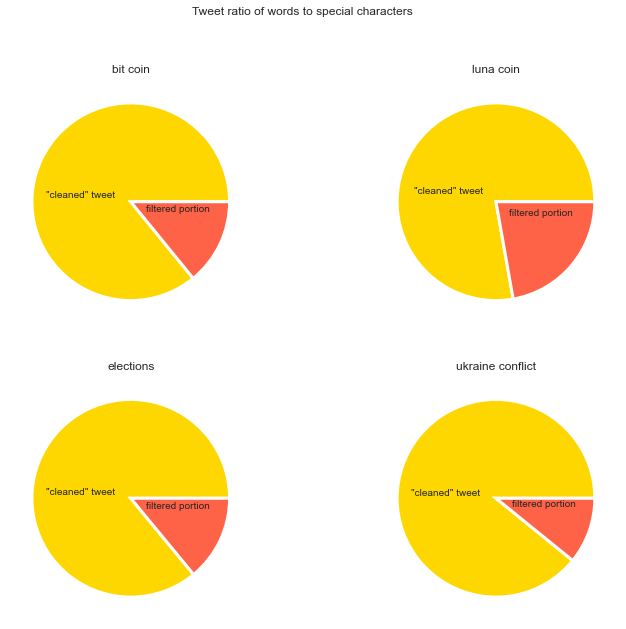

In [12]:
# ratio between simple text and internet lingo

fig,axs = plt.subplots(2,2, figsize=(12, 10))

len_tweets = df_bitcoin_clean.loc[:,['tweet','clean']]
len_tweets['tweet'] = len_tweets['tweet'].apply(lambda x: len(str(x)) - str(x).count(' '))
len_tweets['clean'] = len_tweets['clean'].apply(lambda x: len(str(x)) - str(x).count(' '))
x = len_tweets['tweet'] - len_tweets['clean']
vals = [len_tweets['clean'].sum(), x.sum()]
axs[0,0].pie(vals, colors=colors_lingo, labels=labels_lingo, labeldistance=0.17, wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[0,0].set_title("bit coin")

len_tweets = df_luna_clean.loc[:,['tweet','clean']]
len_tweets['tweet'] = len_tweets['tweet'].apply(lambda x: len(str(x)) - str(x).count(' '))
len_tweets['clean'] = len_tweets['clean'].apply(lambda x: len(str(x)) - str(x).count(' '))
x = len_tweets['tweet'] - len_tweets['clean']
vals = [len_tweets['clean'].sum(), x.sum()]
axs[0,1].pie(vals, colors=colors_lingo, labels=labels_lingo, labeldistance=0.17, wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[0,1].set_title("luna coin")

len_tweets = df_elections_clean.loc[:,['tweet','clean']]
len_tweets['tweet'] = len_tweets['tweet'].apply(lambda x: len(str(x)) - str(x).count(' '))
len_tweets['clean'] = len_tweets['clean'].apply(lambda x: len(str(x)) - str(x).count(' '))
x = len_tweets['tweet'] - len_tweets['clean']
vals = [len_tweets['clean'].sum(), x.sum()]
axs[1,0].pie(vals, colors=colors_lingo, labels=labels_lingo, labeldistance=0.17, wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[1,0].set_title("elections")

len_tweets = df_ukraineconflict_clean.loc[:,['tweet','clean']]
len_tweets['tweet'] = len_tweets['tweet'].apply(lambda x: len(str(x)) - str(x).count(' '))
len_tweets['clean'] = len_tweets['clean'].apply(lambda x: len(str(x)) - str(x).count(' '))
x = len_tweets['tweet'] - len_tweets['clean']
vals = [len_tweets['clean'].sum(), x.sum()]
axs[1,1].pie(vals, colors=colors_lingo, labels=labels_lingo, labeldistance=0.17, wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[1,1].set_title("ukraine conflict")

plt.suptitle('Tweet ratio of words to special characters')
plt.show()


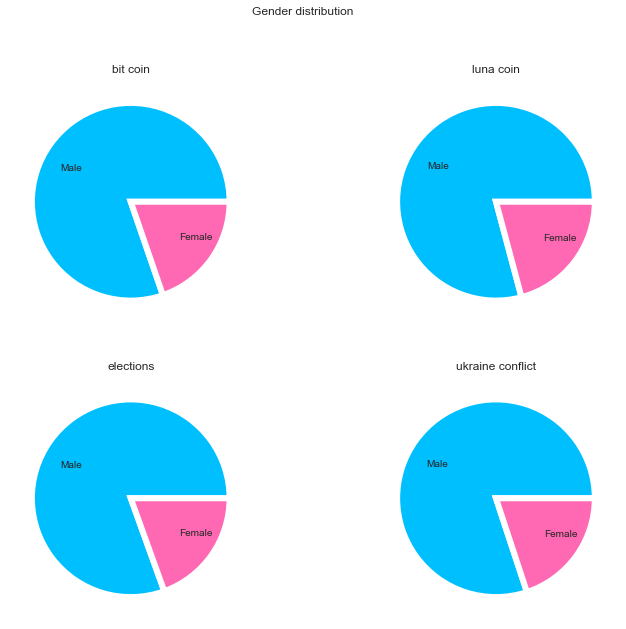

In [13]:
# Gender distribution

fig,axs = plt.subplots(2,2, figsize=(12, 10))

gender_counter = df_bitcoin_clean['gender'].value_counts()
vals = [gender_counter['MALE'], gender_counter['FEMALE']]
axs[0,0].pie(vals, colors=colors_gender, labels=labels_gender, labeldistance=0.6, wedgeprops={"linewidth": 6, "edgecolor": "white"})
axs[0,0].set_title("bit coin")

gender_counter = df_luna_clean['gender'].value_counts()
vals = [gender_counter['MALE'], gender_counter['FEMALE']]
axs[0,1].pie(vals, colors=colors_gender, labels=labels_gender, labeldistance=0.6, wedgeprops={"linewidth": 6, "edgecolor": "white"})
axs[0,1].set_title("luna coin")

gender_counter = df_elections_clean['gender'].value_counts()
vals = [gender_counter['MALE'], gender_counter['FEMALE']]
axs[1,0].pie(vals, colors=colors_gender, labels=labels_gender, labeldistance=0.6, wedgeprops={"linewidth": 6, "edgecolor": "white"})
axs[1,0].set_title("elections")

gender_counter = df_ukraineconflict_clean['gender'].value_counts()
vals = [gender_counter['MALE'], gender_counter['FEMALE']]
axs[1,1].pie(vals, colors=colors_gender, labels=labels_gender, labeldistance=0.6, wedgeprops={"linewidth": 6, "edgecolor": "white"})
axs[1,1].set_title("ukraine conflict")

plt.suptitle('Gender distribution')
plt.show()

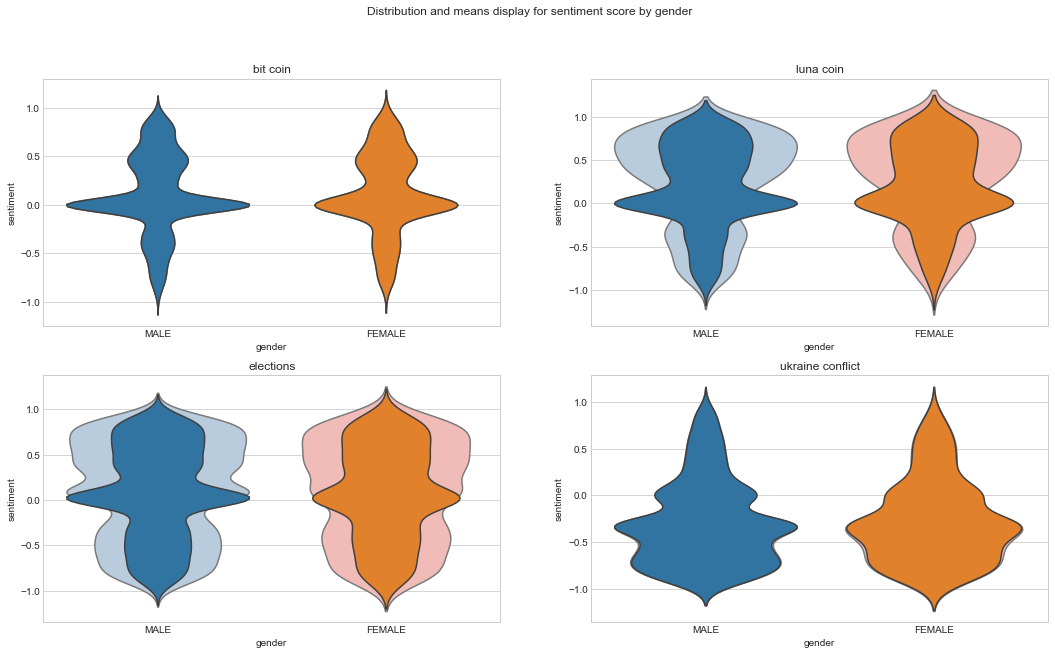

In [18]:
# Distribution and means display for sentiment score by gender

fig,axs = plt.subplots(2,2, figsize=(18, 10))

#sns.boxplot(ax=axs[0,0], data=df_bitcoin, x='gender', y='sentiment')
sns.violinplot(ax=axs[0,0], data=df_bitcoin_dropna_asc, x='gender', y='sentiment', inner=None, palette=pastel1_palette)
sns.violinplot(ax=axs[0,0], data=df_bitcoin_clean, x='gender', y='sentiment', inner=None, palette=default_palette)
axs[0,0].set_title("bit coin")

#sns.boxplot(ax=axs[0,1], data=df_luna_clean, x='gender', y='sentiment')
sns.violinplot(ax=axs[0,1], data=df_luna_dropna_asc, x='gender', y='sentiment', inner=None, palette=pastel1_palette)
sns.violinplot(ax=axs[0,1], data=df_luna_clean, x='gender', y='sentiment', inner=None, palette=default_palette)
axs[0,1].set_title("luna coin")

#sns.boxplot(ax=axs[1,0], data=df_elections_clean, x='gender', y='sentiment')
sns.violinplot(ax=axs[1,0], data=df_elections_dropna_asc, x='gender', y='sentiment', inner=None, palette=pastel1_palette)
sns.violinplot(ax=axs[1,0], data=df_elections_clean, x='gender', y='sentiment', inner=None, palette=default_palette)
axs[1,0].set_title("elections")

#sns.boxplot(ax=axs[1,1], data=ukraineconflict_clean, x='gender', y='sentiment')
sns.violinplot(ax=axs[1,1], data=df_ukraineconflict_dropna_asc, x='gender', y='sentiment', inner=None, palette=pastel1_palette)
sns.violinplot(ax=axs[1,1], data=df_ukraineconflict_clean, x='gender', y='sentiment', inner=None, palette=default_palette)
axs[1,1].set_title("ukraine conflict")

plt.suptitle('Distribution and means display for sentiment score by gender')
plt.show()

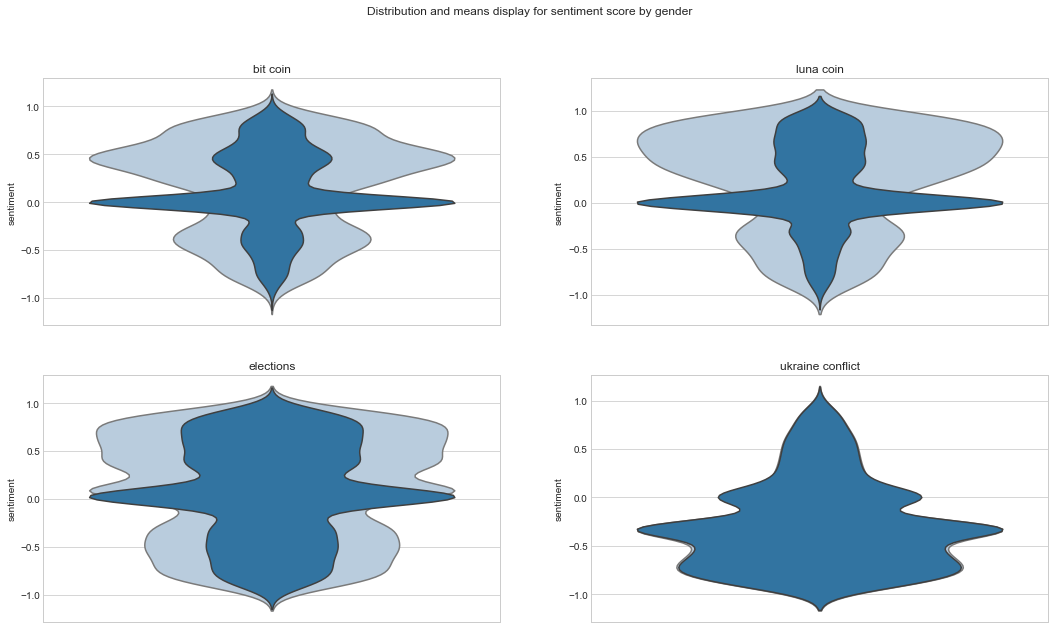

In [139]:
# Distribution and means display for sentiment score by gender

fig,axs = plt.subplots(2,2, figsize=(18, 10))

sns.violinplot(ax=axs[0,0], data=df_bitcoin_dropna_asc, y='sentiment', inner=None, color='#b3cde3')
sns.violinplot(ax=axs[0,0], data=df_bitcoin_clean, y='sentiment', inner=None, color='#1f77b4')
axs[0,0].set_title("bit coin")

sns.violinplot(ax=axs[0,1], data=df_luna_dropna_asc, y='sentiment', inner=None, color='#b3cde3')
sns.violinplot(ax=axs[0,1], data=df_luna_clean, y='sentiment', inner=None, color='#1f77b4')
axs[0,1].set_title("luna coin")

sns.violinplot(ax=axs[1,0], data=df_elections_dropna_asc, y='sentiment', inner=None, color='#b3cde3')
sns.violinplot(ax=axs[1,0], data=df_elections_clean, y='sentiment', inner=None, color='#1f77b4')
axs[1,0].set_title("elections")

sns.violinplot(ax=axs[1,1], data=df_ukraineconflict_dropna_asc, y='sentiment', inner=None, color='#b3cde3')
sns.violinplot(ax=axs[1,1], data=df_ukraineconflict_clean, y='sentiment', inner=None, color='#1f77b4')
axs[1,1].set_title("ukraine conflict")

plt.suptitle('Distribution and means display for sentiment score by gender')
plt.show()

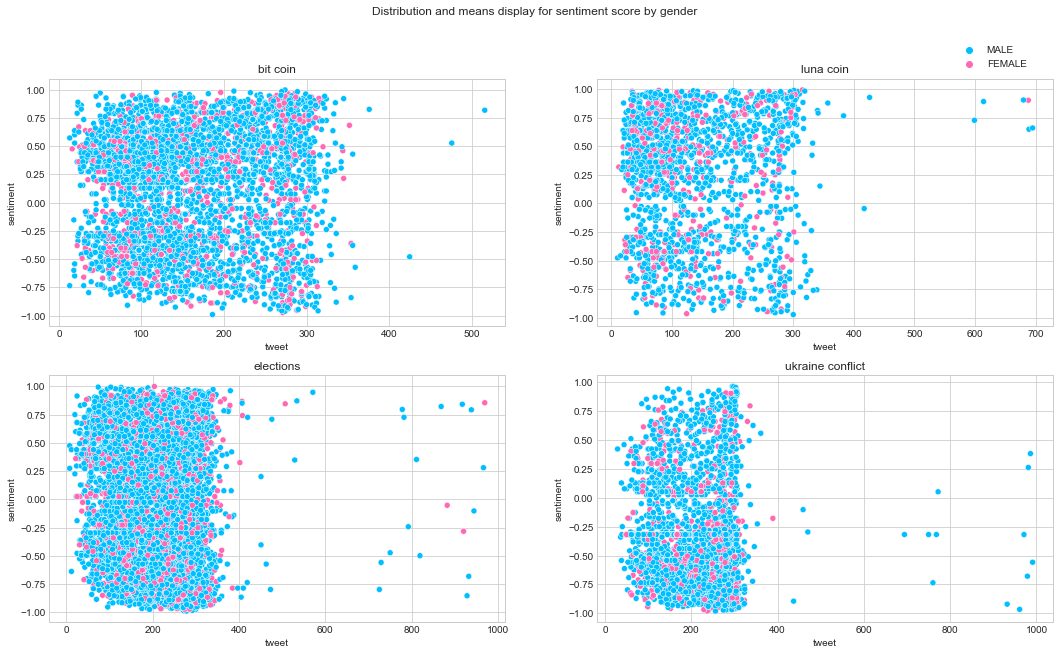

In [92]:
# Correlation between length of tweet to sentiment score

fig,axs = plt.subplots(2,2, figsize=(18, 10))

len_tweets = df_bitcoin_dropna.loc[:,['tweet','gender','sentiment']]
len_tweets['tweet'] = len_tweets['tweet'].apply(lambda x: len(x))
sns.scatterplot(ax=axs[0,0], data=len_tweets, x='tweet', y='sentiment', hue='gender', palette=gender_palette, legend = False)
axs[0,0].set_title("bit coin")

len_tweets = df_luna_dropna.loc[:,['tweet','gender','sentiment']]
len_tweets['tweet'] = len_tweets['tweet'].apply(lambda x: len(x))
sns.scatterplot(ax=axs[0,1], data=len_tweets, x='tweet', y='sentiment', hue='gender', palette=gender_palette)
axs[0,1].set_title("luna coin")
axs[0,1].legend(bbox_to_anchor =(0.95, 1.15), loc='upper right', borderaxespad=0.)

len_tweets = df_elections_dropna.loc[:,['tweet','gender','sentiment']]
len_tweets['tweet'] = len_tweets['tweet'].apply(lambda x: len(x))
sns.scatterplot(ax=axs[1,0],data=len_tweets, x='tweet', y='sentiment', hue='gender', palette=gender_palette, legend = False)
axs[1,0].set_title("elections")

len_tweets = df_ukraineconflict_dropna.loc[:,['tweet','gender','sentiment']]
len_tweets['tweet'] = len_tweets['tweet'].apply(lambda x: len(x))
sns.scatterplot(ax=axs[1,1], data=len_tweets, x='tweet', y='sentiment', hue='gender', palette=gender_palette, legend = False)
axs[1,1].set_title("ukraine conflict")

plt.suptitle('Distribution and means display for sentiment score by gender')
plt.show()

In [14]:
for c in sns.color_palette('Pastel1').as_hex():
    print(c)

,Unnamed: 0,user_id,tweet,gender,clean,sentiment
0,0,160366223,@CarlBMenger You realize you just proposed the...,MALE,you realize you just proposed the argument as ...,-0.3612
1,1,1505414802751037440,Cosmos (ATOM) Skyrockets 12% Following Bitcoin...,FEMALE,cosmos atom skyrockets 12 following bitcoin an...,0.0000
2,2,956327190039351298,"@FA_Touadera Bitcoin only. Not ""crypto"".",FEMALE,bitcoin only not crypto,0.0000
3,3,949053262967304192,@jimmyjoebob20 @mattjamesbtc @NikoXilo @he0355...,MALE,the answer is bitcoin,0.0000
4,4,1360389938341179396,"Do Kwon faces legal troubles in Korea, China r...",MALE,do kwon faces legal troubles in korea china re...,-0.1779
5,5,1152071108180369410,@MTradess Dunno. It is safer for me to stay a...,MALE,dunno it is safer for me to stay away from bit...,0.4215
6,6,1501409452892868609,What is your favorite thing to buy today? #BI...,MALE,what is your favorite thing to buy today bitco...,0.4588
7,7,2801293146,@Rito_Rhymes @RoaringAuctions @cb_doge @westco...,MALE,dogeparty is a clone of bitcoins counterparty ...,-0.1298
8,8,2476187870,MRC27 found #bitcoin in a Blue vault at this l...,MALE,mrc27 found bitcoin in a blue vault at this lo...,0.7964
9,9,1479016107554000898,Don’t sell your #satoshis! Don’t allow central...,FEMALE,don’t sell your satoshis don’t allow centraliz...,0.5859
